# Discrete time Kermack-McKendrick Model

```{contents} Table of Contents
:depth: 3
```

## Why does the SIR assume an exponential distribution for the infectious period?

The majority of work with compartmental models assumes that the amound of time an individual spends in a disease state is exponentially distributed. For example, for the SIR model 

\begin{align}
    \frac{dS}{dt} &= -\beta \frac{SI}{N}  \\
    \frac{dI}{dt} &=  \beta \frac{SI}{N} - \gamma I \\
    \frac{dR}{dt} &=  \gamma I
\end{align}

after an individual becomes infectious (moves from S to I) they spend on average $1/\gamma$ time units in this infectious state. However, we may wonder what the density of infectious periods (time spend in the I state) is. 
The SIR model implicitly assumes that the density of infectious periods is exponential. 
To see this, for a small increment of time $\tau$, we assume an individual leaves the infectious state with probability $\gamma \tau$. This means that an individual remains infectious for this small period of time $\tau$ with probability $1-\gamma \tau$.
Then the probability that an individual is still infectious in the interval $t + \tau$ is the probability that they remain infectious in the interval $[0,\tau],[\tau,2\tau],[2\tau,3\tau],\cdots,[t-\tau ,t]$ equals $p(\text{still infectious}) = (1-\gamma \tau)^{t/\tau}$ and so the probability that they are no longer infectious in the interval $[t,t+\tau]$ is 

\begin{align}
    p( \text{no longer infectious} \in [t,t+\tau] )  = \gamma \tau (1-\gamma \tau)^{t/\tau}
\end{align}

For continuous time, when $\tau$ moves towards infinity, from calculus we know that 

\begin{align}
   \lim_{\tau \to 0} (1-\gamma \tau)^{t/\tau} = e^{-\gamma t}
\end{align}

we also know that in continuous time, as we shrink this interval $\tau$, that probabilities turn into probability densities. In other words 

\begin{align}
    p( \text{no longer infectious} \in [t,t+\tau] ) \approx f(t) \tau 
\end{align}

where $f$ is the probability density that an individual is no longer infectious in an interval from $t$ to $t+\tau$.
Then as $\tau$ shrinks we find that 

\begin{align}
    p( \text{no longer infectious} \in [t,t+\tau] )  &= \gamma \tau (1-\gamma \tau)^{t/\tau} \\ 
    f(t) \tau &\approx \gamma \tau e^{-\gamma t} \\ 
    f(t) &=  \gamma e^{-\gamma t}
\end{align}

The density above $f(t)$ is an exponential distribution with paramter $\gamma$. 

The derivative of the above is 

\begin{align}
    \frac{df}{dt} = -\gamma \left[\gamma e^{-\gamma t}\right] = -\gamma f(t)
\end{align}

This is the key. We assume in the SIR model that infectious individuals leave the infectious state like 

\begin{align}
    \frac{dI}{dt} = -\gamma I
\end{align}

This can only mean that the infectious period is assumed to have an exponential density. 

## The discrete-time Kermack McKendrick model

If an infectious diseases did have an exponential period then it would mean that the probability you remain infectious decreases tremendously with time and that there is no 'typical' time in which an individual is infecitous.
For most infectious diseases, an exponential distributed infectious period is unrealistic because there is a typical amount of time an individual remains infectious. 

Our goal will be to study the discrete-time Kermack McKendrick model as a means of incorporating any type of infectious period. We will follow closely the paper: [The discrete-time Kermack–McKendrick model: A versatile and computationally attractive framework for modeling epidemics](https://www.pnas.org/doi/10.1073/pnas.2106332118).

For the typical SIR, we assume that the number of susceptibles is depleted like 

\begin{align}
    \frac{dS(t)}{dt} = -\beta \frac{I(t)}{N} S(t) 
\end{align}

We can think of $\beta \frac{I(t)}{N}$ as a function of the number of infectors in the system.
This function is often called **the force of infection** and, for the SIR model, is defined as the function $\Lambda(t)$ of $t$  

\begin{align}
    \Lambda(t) = \beta \frac{I(t)}{N}
\end{align}

We can substitute in the above function to obtain 

\begin{align}
    \frac{dS(t)}{dt} = - \Lambda(t) S(t) 
\end{align}

However the function that we chose, $\Lambda(t) = \beta \frac{I(t)}{N}$ , is just one of an infinite number of **force of infection** functions that we can use to describe the loss of susceptibles to infections. For now, lets continue with the general function $\Lambda(t)$. 
Suppose we wish to solve the above differential equation over a small time interval from $t$ to $t+\tau$.
The fundemental theorem of calculus tell us to integrate

\begin{align}
    \int_{x=t}^{x=t+\tau} \frac{dS(x)}{dx} \frac{1}{S(x)} \; dx = - \int_{x=t}^{x=t+\tau} \Lambda(x)  \; dx \\
    \int_{x=t}^{x=t+\tau} \frac{ d \left[\log(S(x))\right]}{dx} \; dx = - \int_{x=t}^{x=t+\tau} \Lambda(x)  \; dx \\
    \log(S(t+\tau)) - \log(S(t)) = - \int_{x=t}^{x=t+\tau} \Lambda(x)  \; dx \\ 
    \log\left[ \frac{S(t+\tau)}{S(t)} \right] = - \int_{x=t}^{x=t+\tau} \Lambda(x)  \; dx \\ 
    \frac{S(t+\tau)}{S(t)} = \exp \left[ - \int_{x=t}^{x=t+\tau} \Lambda(x)  \; dx \right]\\
    S(t+\tau) = S(t)\exp \left[ - \int_{x=t}^{x=t+\tau} \Lambda(x)  \; dx \right]
\end{align}

Lets simplify the above equation by defining the **cumulative force of infection**

\begin{align}
     \hat{\Lambda} (t) = \int_{x=t}^{x=t+\tau} \Lambda(x)  \; dx
\end{align}

Then our final equation above simplifies to 

\begin{align}
    S(t+\tau) &= S(t)\exp \left[ - \int_{x=t}^{x=t+\tau} \Lambda(x)  \; dx \right] \\ 
             &= S(t)\exp \left[- \hat{\Lambda} (t)\right] \\ 
\end{align}

Note: that the number of susceptibles can only stay the same or decrease because the expression $\exp \left[- \hat{\Lambda} (t)\right]$ is at most the value one. That is, for this formulation, we do not consider individuals moving back to the susceptible disease state. 

Though we can use any function $\hat{\Lambda} (t)$, a common function supposes that previously infected individuals can infect others in the system. 
This is the defining characteristic of an infectious diseases---that the risk of disease is related to the number of infections in the system. 

The original 1927 paper that specifies the evolution of an infectious disease chose as a function 

\begin{align}
    \hat{\Lambda}(t) = \int_{l=0}^{l=\infty} \mathcal{A}(l) \times \Lambda(t-l) S(t-l) \; dl  
\end{align}

where we say that $l$ is the lag or a number that describes the number of time units in the past (relative to $t$).
This proposed function has two components.
The function $\mathcal{A}(l)$ needs to be set by the modeler as is called **the contribution to the force of infection**.
More on this later. 
The term $\Lambda(t-l) S(t-l)$ is the change in the number of susceptibles $l$ time units ago.
For the Kermack-McKendrick model, all the susceptibles move to the infected state.
That is, the change in the number of susceptibles is the number of **incident infections** at time $t-l$. 

Define incident infections at time $t$. Then 

\begin{align}
    \hat{\Lambda}(t) = \int_{l=0}^{l=\infty} \mathcal{A}(l) \times i(t-l)\; dl  
\end{align}

The **contribution to the force of infection** should be interpreted as the probability that an infected individual makes effective contact, contact resulting in infection, when they come into contact with a susceptible. 

## An equation for the basic reproduction number 

Suppose that we introduce a single infected individual at time zero into a population where the remaining $N-1 \approx N$ individuals are susceptible. 
Then at time zero this incident, infected individual is expected to contact all $N$ susceptibles and infect on average  $N \mathcal{A(0)}$ of them. 
Lets continue to follow the path of this incident infector.
At time one, we would expect that they infect $N \mathcal{A(1)}$ susceptibles (assuming the population is approximately still $N$). 
At time two, three, and four we would expect this infector to produce $N \mathcal{A(2)}$,$N \mathcal{A(3)}$,$N \mathcal{A(4)}$ infections. 

That is, the expected number of infections generated from a single infected individual in an entirely susceptible population is

\begin{align}
    \mathcal{R}_{0}  = N \int_{l=0}^{l=\infty} \mathcal{A}(l) \; dl
\end{align}


## Discretization to make things a bit easier

We typically do not, and cannot, observe outbreaks on a continuous timescale. 
Public health resources are limited and so we typically observe incident, reported infections at the day, week, month, or even only the annual time scale. 
Because of this, it makes more sense to look at a discretized version of the above.
That is, to replace integrals with summations.

Our discretized KM model is 

\begin{align}
    S(t+1)     &= S(t) \exp\left[ -\hat{\Lambda}(t) \right] \\
    \Lambda(t) &= \sum_{l=0}^{l=C} \mathcal{A}(l) \times i(t-l)
\end{align}

where we introduce the parameter $C$ as a limit to how far back we "look" when assuming infectors in the past are generating new infections. That is, we assume an individual who was infected $C$ time units ago is no longer producing new infections.

## The generation interval


Let $\sum_{l=0}^{\infty} \mathcal{A}(l)$ be the total number of average infections (the basic reproduction number) for a single infector. 
Then  $g(l) = A(l) / \sum_{l=0}^{\infty} \mathcal{A}(l)$ is the probability that an individual was infected $l$ time units ago.
The time between an infector contacting a susceptible and when that susceptible becomes infectious is called **the generation interval**.

To see this, suppose 

\begin{align}
    \mathcal{A}(0) &= 1/2 \\ 
    \mathcal{A}(1) &= 1/4  \\
    \mathcal{A}(2) &= 1    \\
    \mathcal{A}(3) &= 1/3
\end{align}

or we expect a single infector to produce a total of 2.08 infections.
Lets normalize the above $\mathcal{A}$.
Then we find 

\begin{align}
    g(0) &= 0.24 \\ 
    g(1) &= 0.12  \\
    g(2) &= 0.48    \\
    g(3) &= 0.16
\end{align}

and say that there is a (for example) 0.48 probability that 2 time units ago a susceptible individual made effective contact with an infector and is now infectious.  

The above argument suggests a relationship between the basic reproduction number, contribution to force of infection, and the generation interval. 

\begin{align}
    g(l) = \frac{\mathcal{A}(l)}{\mathcal{R}_{0}}
\end{align}


## Coding up the discrete time KM model

In [74]:
def g(t):
    if t==0:
        return 0.24
    elif t==1:
        return 0.12
    elif t==2:
        return 0.48    
    elif t==3:
        return 0.16
    else:
        return 0 


def A(R0,g,t):
    return R0*g(t)

start,end = 0,100
S0        = 1000
N         = 1001

R0 = 1.50/N

S = [S0]
i = [0,0,0,1]

for t in np.arange(start+3,end):
    #--compute lambda
    L = 0
    for l in np.arange(0,4):
        L = L+A(R0,g,l)*i[t-l]
    St = S[-1]*(np.exp(-L))
    
    i.append( S[-1]-St )
    S.append( St )

i_g1 = i

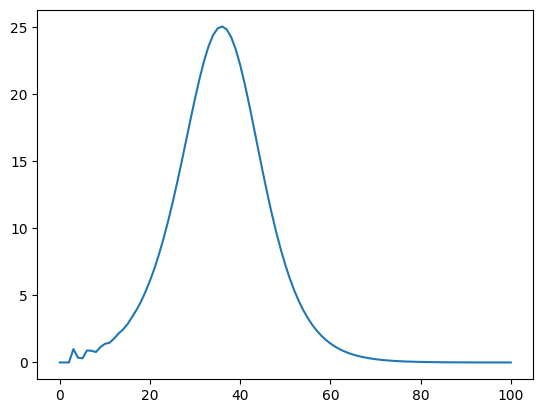

In [75]:
plt.plot(i_g1)

In [79]:
def g(t):
    if t==0:
        return 0.48
    elif t==1:
        return 0.24
    elif t==2:
        return 0.12    
    elif t==3:
        return 0.16
    else:
        return 0 
        
def A(R0,g,t):
    return R0*g(t)

start,end = 0,100
S0        = 1000
N         = 1001

R0 = 1.50/N

S = [S0]
i = [0,0,0,1]

for t in np.arange(start+3,end):
    #--compute lambda
    L = 0
    for l in np.arange(0,4):
        L = L+A(R0,g,l)*i[t-l]
    St = S[-1]*(np.exp(-L))
    
    i.append( S[-1]-St )
    S.append( St )

i_g2 = i

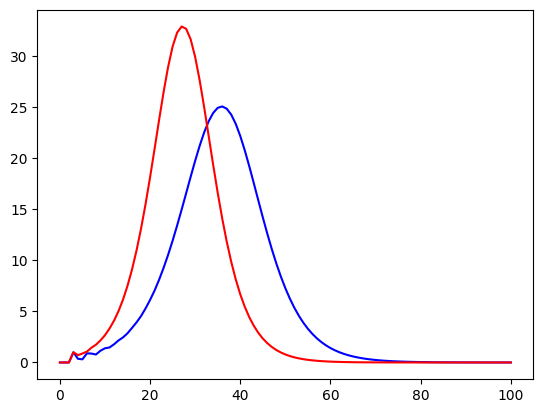

In [78]:
plt.plot(i_g1,color="blue")
plt.plot(i_g2,color="red")
plt.show()